# Problem Statement:
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from collections import Counter
from sklearn.tree import  DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

In [52]:
data=pd.read_csv("Fraud_check.csv")
data

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [53]:
data.shape

(600, 6)

In [54]:
# Rename the data

data.rename({'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'},axis=1,inplace=True)
data

Undergrad Marital_Status  Taxable_Income  City_Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work_Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [55]:
# Encoding The Categorical variable

label_encoder1=preprocessing.LabelEncoder()
data['Undergrad']=label_encoder1.fit_transform(data['Undergrad'])
data['Marital_Status']=label_encoder1.fit_transform(data['Marital_Status'])
data['Urban']=label_encoder1.fit_transform(data['Urban'])
data

Undergrad  Marital_Status  Taxable_Income  City_Population  \
0            0               2           68833            50047   
1            1               0           33700           134075   
2            0               1           36925           160205   
3            1               2           50190           193264   
4            0               1           81002            27533   
..         ...             ...             ...              ...   
595          1               0           76340            39492   
596          1               0           69967            55369   
597          0               0           47334           154058   
598          1               1           98592           180083   
599          0               0           96519           158137   

     Work_Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..               ...    ...  
595                7      1  
596                2      1  
597                0      1  
598               17      0  
599               16      0  

[600 rows x 6 columns]

In [56]:
# Creating new cols by dividing 'Taxable.Income' cols on the basis of [10000,30000,99000] for Risky and Good

data['Tax_Status']=pd.cut(data['Taxable_Income'], bins = [10000,30000,99000], labels = ["Risky", "Good"])
data

Undergrad  Marital_Status  Taxable_Income  City_Population  \
0            0               2           68833            50047   
1            1               0           33700           134075   
2            0               1           36925           160205   
3            1               2           50190           193264   
4            0               1           81002            27533   
..         ...             ...             ...              ...   
595          1               0           76340            39492   
596          1               0           69967            55369   
597          0               0           47334           154058   
598          1               1           98592           180083   
599          0               0           96519           158137   

     Work_Experience  Urban Tax_Status  
0                 10      1       Good  
1                 18      1       Good  
2                 30      1       Good  
3                 15      1       Good  
4                 28      0       Good  
..               ...    ...        ...  
595                7      1       Good  
596                2      1       Good  
597                0      1       Good  
598               17      0       Good  
599               16      0       Good  

[600 rows x 7 columns]

In [57]:
data['Tax_Status']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Tax_Status, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [58]:
# encoding Tax_Status

data['Tax_Status']=label_encoder1.fit_transform(data['Tax_Status'])
data

Undergrad  Marital_Status  Taxable_Income  City_Population  \
0            0               2           68833            50047   
1            1               0           33700           134075   
2            0               1           36925           160205   
3            1               2           50190           193264   
4            0               1           81002            27533   
..         ...             ...             ...              ...   
595          1               0           76340            39492   
596          1               0           69967            55369   
597          0               0           47334           154058   
598          1               1           98592           180083   
599          0               0           96519           158137   

     Work_Experience  Urban  Tax_Status  
0                 10      1           0  
1                 18      1           0  
2                 30      1           0  
3                 15      1           0  
4                 28      0           0  
..               ...    ...         ...  
595                7      1           0  
596                2      1           0  
597                0      1           0  
598               17      0           0  
599               16      0           0  

[600 rows x 7 columns]

In [59]:
data.describe()

Undergrad  Marital_Status  Taxable_Income  City_Population  \
count  600.000000      600.000000      600.000000       600.000000   
mean     0.520000        1.046667    55208.375000    108747.368333   
std      0.500017        0.821958    26204.827597     49850.075134   
min      0.000000        0.000000    10003.000000     25779.000000   
25%      0.000000        0.000000    32871.500000     66966.750000   
50%      1.000000        1.000000    55074.500000    106493.500000   
75%      1.000000        2.000000    78611.750000    150114.250000   
max      1.000000        2.000000    99619.000000    199778.000000   

       Work_Experience       Urban  Tax_Status  
count       600.000000  600.000000  600.000000  
mean         15.558333    0.503333    0.230000  
std           8.842147    0.500406    0.448071  
min           0.000000    0.000000    0.000000  
25%           8.000000    0.000000    0.000000  
50%          15.000000    1.000000    0.000000  
75%          24.000000    1.000000    0.000000  
max          30.000000    1.000000    2.000000

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital_Status   600 non-null    int32
 2   Taxable_Income   600 non-null    int64
 3   City_Population  600 non-null    int64
 4   Work_Experience  600 non-null    int64
 5   Urban            600 non-null    int32
 6   Tax_Status       600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


In [61]:
data.isnull().sum()

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
Tax_Status         0
dtype: int64

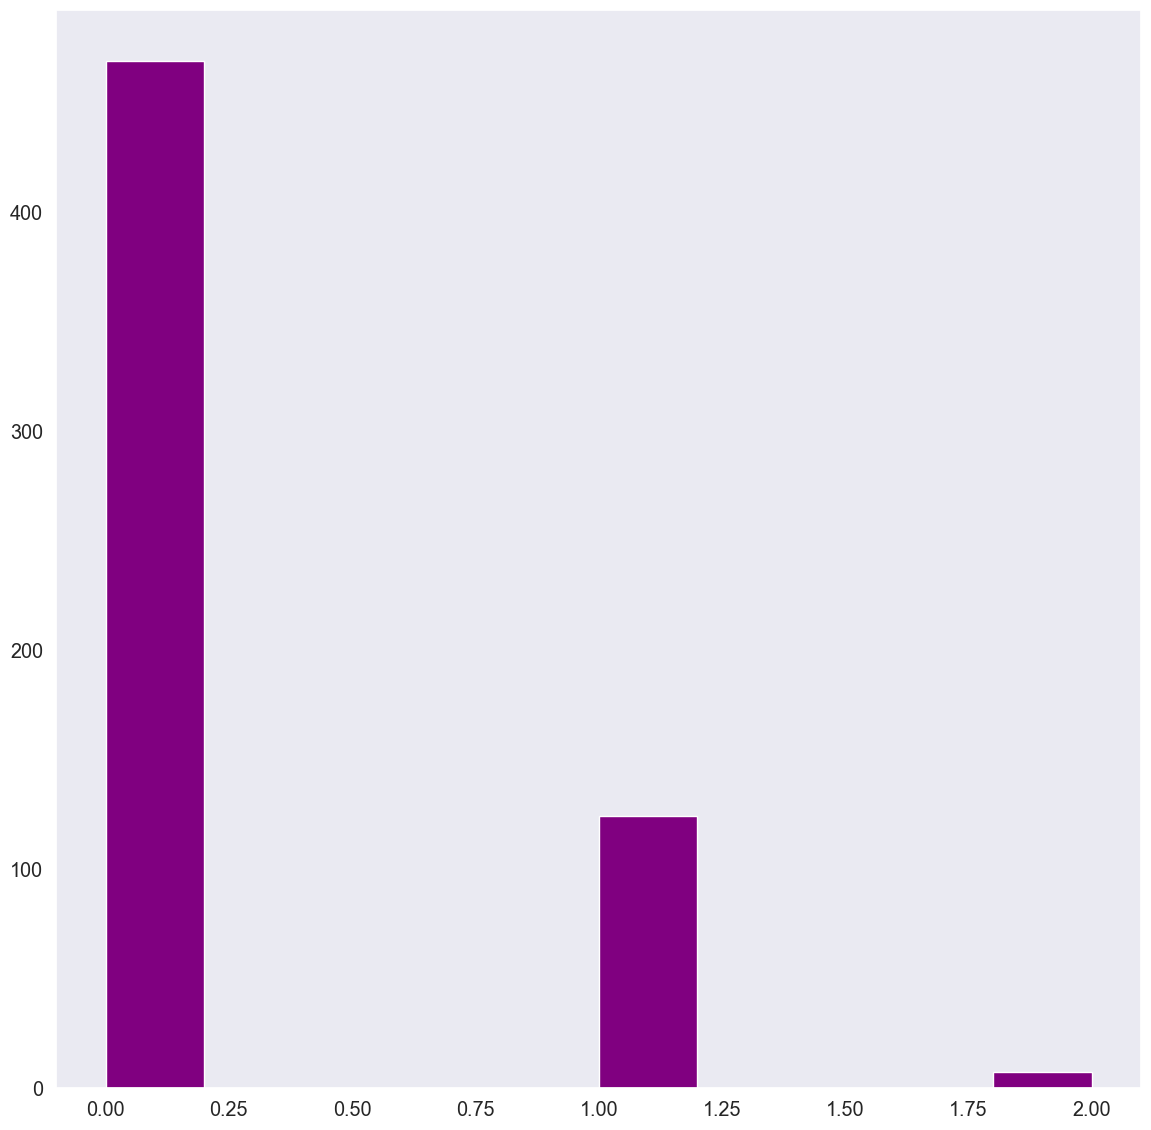

In [62]:
plt.hist('Tax_Status',data=data,color='purple')
plt.show()

# Data Analysis

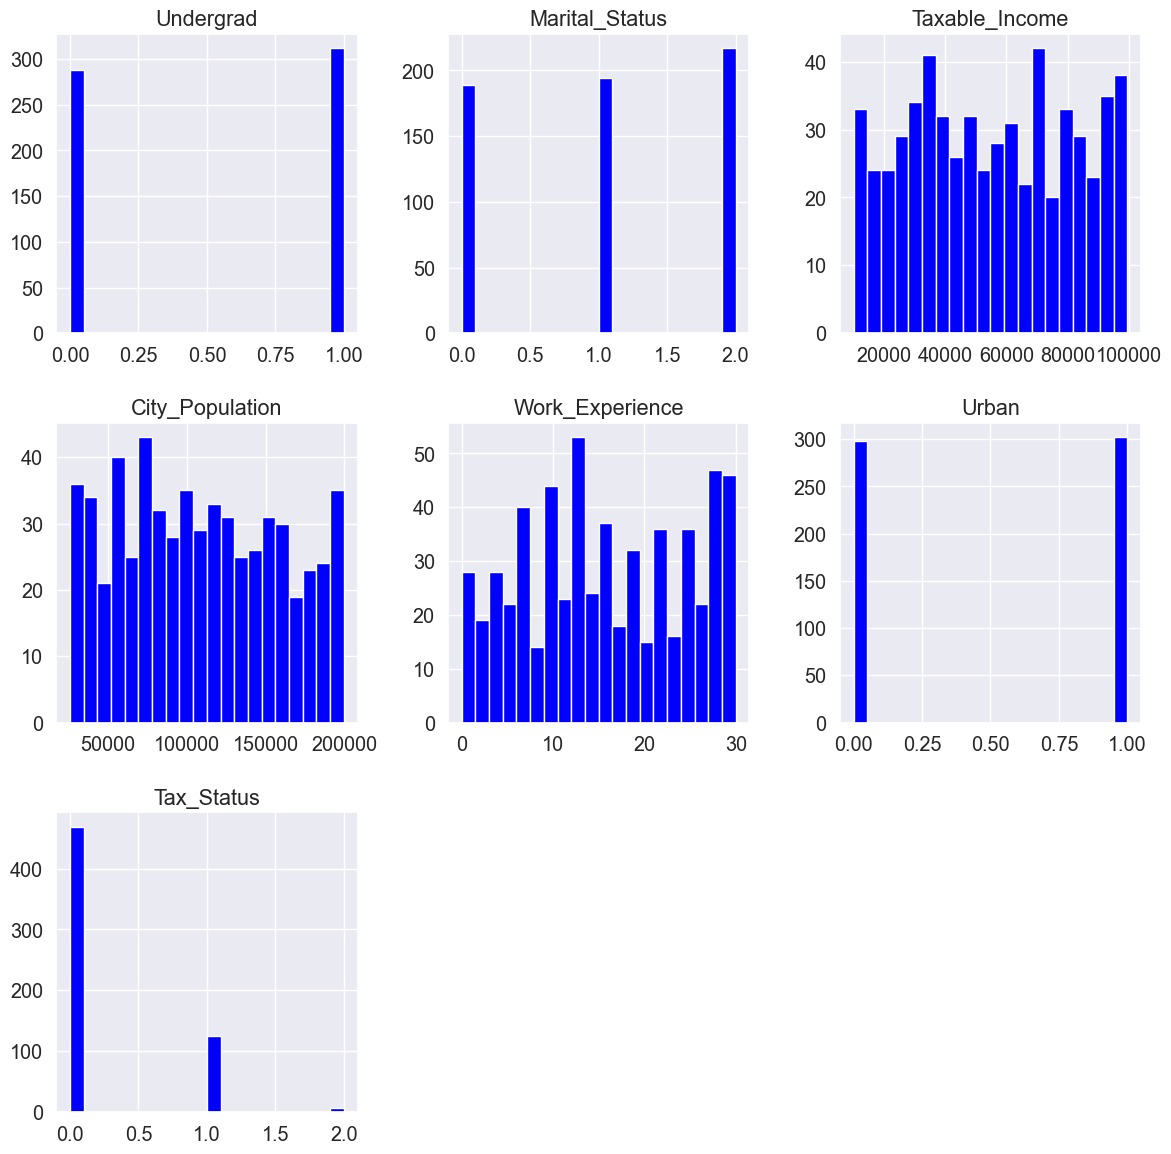

In [63]:
sns.set(style= 'dark', font_scale= 1.3, rc= {'figure.figsize':(14,14)})
ax = data.hist(bins= 20, color= 'blue')

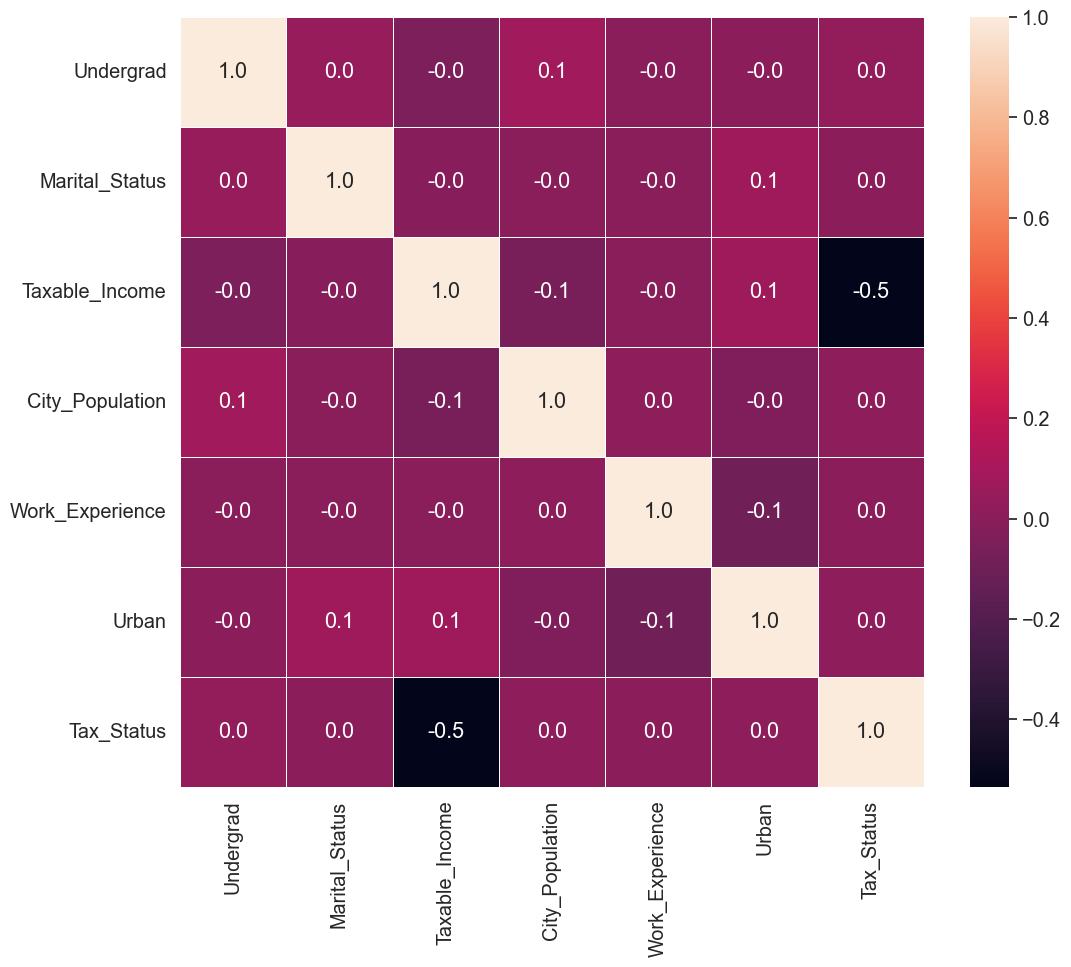

In [64]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

<Axes: >

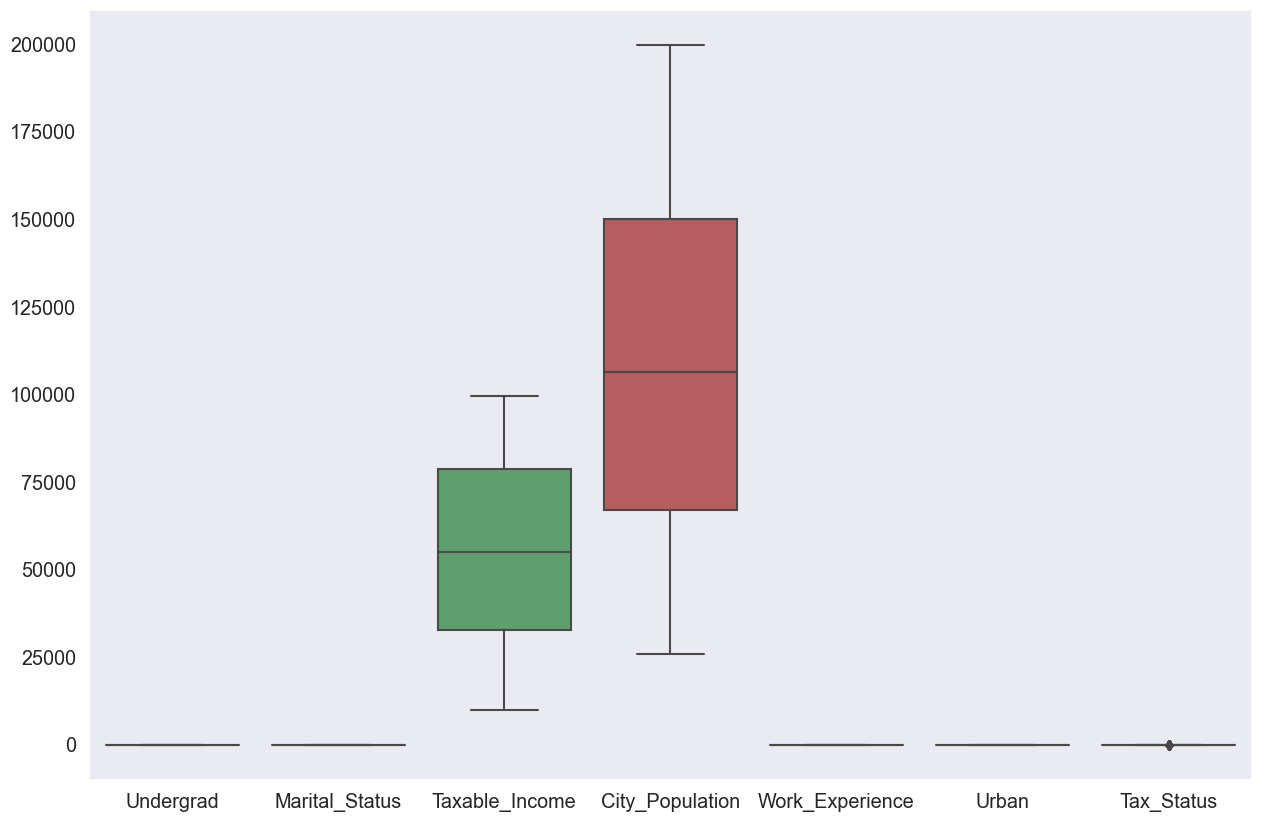

In [65]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


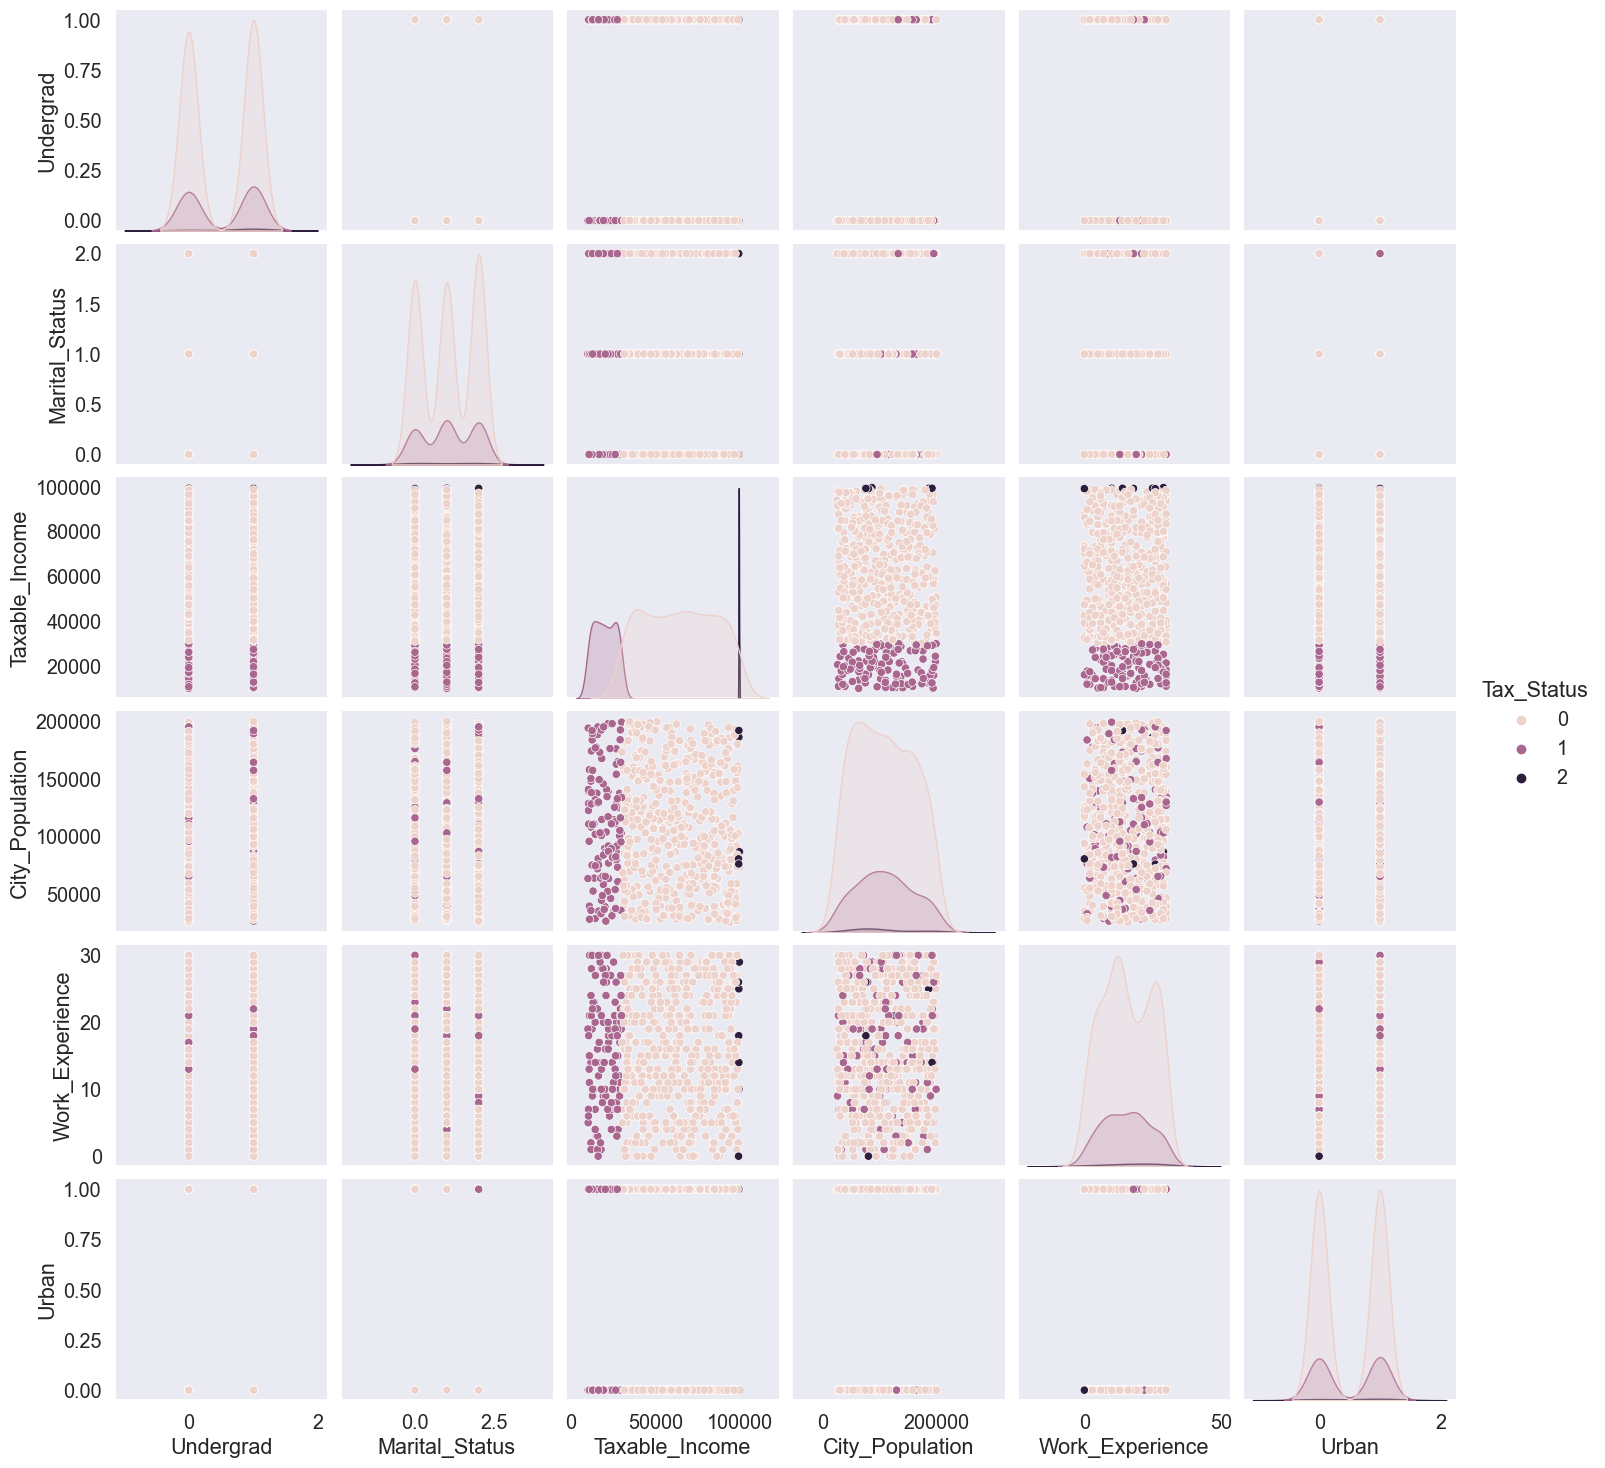

In [66]:
sns.pairplot(data=data, hue = 'Tax_Status')
plt.show()

In [67]:
# Droping the Taxable income AND City Population variable

data.drop(['Taxable_Income'],axis=1,inplace=True)
data.drop(['City_Population'],axis=1,inplace=True)
data

Undergrad  Marital_Status  Work_Experience  Urban  Tax_Status
0            0               2               10      1           0
1            1               0               18      1           0
2            0               1               30      1           0
3            1               2               15      1           0
4            0               1               28      0           0
..         ...             ...              ...    ...         ...
595          1               0                7      1           0
596          1               0                2      1           0
597          0               0                0      1           0
598          1               1               17      0           0
599          0               0               16      0           0

[600 rows x 5 columns]

In [68]:
# Splitting into x and y variable

x = data.iloc[:, :4]
y=  data.Tax_Status

In [69]:
x

Undergrad  Marital_Status  Work_Experience  Urban
0            0               2               10      1
1            1               0               18      1
2            0               1               30      1
3            1               2               15      1
4            0               1               28      0
..         ...             ...              ...    ...
595          1               0                7      1
596          1               0                2      1
597          0               0                0      1
598          1               1               17      0
599          0               0               16      0

[600 rows x 4 columns]

In [70]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Tax_Status, Length: 600, dtype: int32

In [71]:
data.Tax_Status.value_counts()

Tax_Status
0    469
1    124
2      7
Name: count, dtype: int64

In [72]:
colnames = list(data.columns)
colnames

['Undergrad', 'Marital_Status', 'Work_Experience', 'Urban', 'Tax_Status']

In [73]:
# Splitting data into training and testing data set

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [74]:
y_train

332    0
13     0
274    0
257    0
112    0
      ..
440    0
165    0
7      0
219    1
326    1
Name: Tax_Status, Length: 480, dtype: int32

In [75]:
x_train

Undergrad  Marital_Status  Work_Experience  Urban
332          1               0                1      0
13           0               1               16      1
274          1               1               25      0
257          1               1               17      1
112          1               2               26      1
..         ...             ...              ...    ...
440          0               2               13      1
165          1               1               23      1
7            1               2                3      1
219          1               0                9      0
326          1               0               19      1

[480 rows x 4 columns]

# Building Decision Tree Classifier using gini Criteria

In [81]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [82]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0    120
Name: count, dtype: int64

In [83]:
# Accuracy 
np.mean(preds==y_test)

0.75

In [84]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=1500)
tree.plot_tree(model,
               filled = True);

In [85]:
print(classification_report(y_test,preds))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86        90
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00         2

    accuracy                           0.75       120
   macro avg       0.25      0.33      0.29       120
weighted avg       0.56      0.75      0.64       120



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
model.feature_importances_

array([0.27268592, 0.20470556, 0.52260852, 0.        ])

# Building Decision Tree Classifier (CART) using entropyCriteria

In [87]:
model1 = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [89]:
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [90]:
#Prediction and computing the accuracy

preds=model1.predict(x_test)
metrics.accuracy_score(preds,y_test)

0.7416666666666667

In [91]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85        90
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00         2

    accuracy                           0.74       120
   macro avg       0.25      0.33      0.28       120
weighted avg       0.56      0.74      0.64       120



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
model1.feature_importances_

array([0.1740707 , 0.24128205, 0.46332069, 0.12132656])

In [94]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=1500)
tree.plot_tree(model1,
               filled = True);